MSE: 2437171637911.98, R-squared: 0.3095


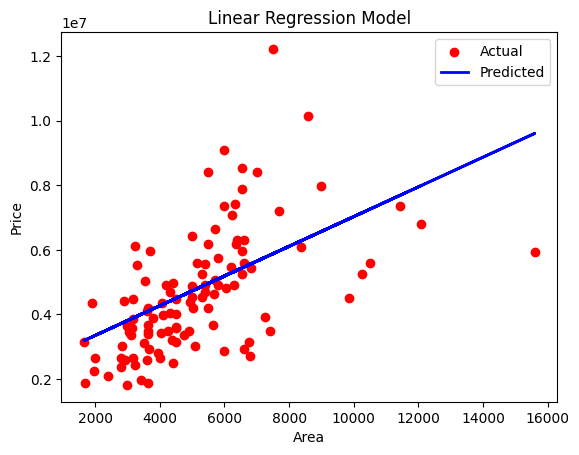

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Housing.csv")

X = df[['area']]
Y = df['price']

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=100)

X_train_sm = sm.add_constant(train_X)
ols_model = sm.OLS(train_Y, X_train_sm).fit()
# print(ols_model.summary())

lr_model = LinearRegression()
lr_model.fit(train_X, train_Y)


y_train_pred = lr_model.predict(train_X)
y_test_pred = lr_model.predict(test_X)


mse = mean_squared_error(test_Y, y_test_pred)
r2 = r2_score(test_Y, y_test_pred)

print(f"MSE: {mse:.2f}, R-squared: {r2:.4f}")

plt.scatter(test_X, test_Y, color="red", label='Actual')
plt.plot(test_X, y_test_pred, color='blue', linewidth=2, label='Predicted')

plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression Model')
plt.show()